In [31]:
%reload_ext autoreload
%autoreload 2

The following example was taken from Reddy (2005) "An introduction to non-linear finite element analysis" Section 9.4.5.

Here we present numerical results obtained for a cantilevered rectangular plate of length a = 10 in, height b = 1 in, and thickness h = 0:1 in, and subjected to uniformly distributed in-plane load ty = -q0 psi, acting downward, along its length. The material of the plate has a modulus ofE = 1.2E7 psi and Poisson's ratio of nu = 0.3.

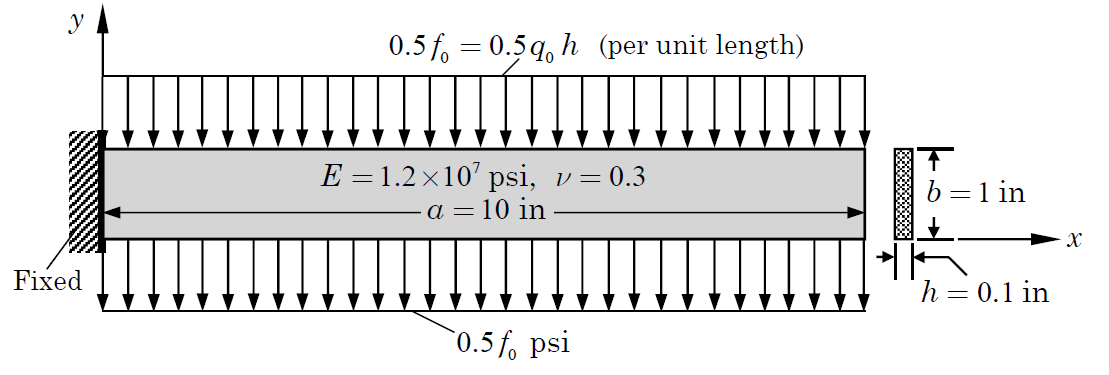

### General Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt

### Mesh definition

In [33]:
from mesh_utils import UniformQuadMesh2D

lx = 10                 # Dimension along x-coord
ly = 1                  # Dimension along y-coord
nx = 5                  # Number of elements along x-coord
ny = 1                  # Number of elements along y-coord
element_type = 'Q8'     # Type of elements

cantilever_mesh = UniformQuadMesh2D(lx, ly, nx, ny, element_type=element_type)
cantilever_mesh.compute()


In [34]:
print(f'\nNodal coordinates:\n {cantilever_mesh.coordinates}')
print(f'\nElement connectivity:')
for elem_i in cantilever_mesh.elements:
    print(elem_i.nodes)

print(f'\nNumber of nodes: {cantilever_mesh.nnod}')
print(f'Number of elements: {cantilever_mesh.nelem}')


Nodal coordinates:
 [[ 0.   0. ]
 [ 1.   0. ]
 [ 2.   0. ]
 [ 3.   0. ]
 [ 4.   0. ]
 [ 5.   0. ]
 [ 6.   0. ]
 [ 7.   0. ]
 [ 8.   0. ]
 [ 9.   0. ]
 [10.   0. ]
 [ 0.   0.5]
 [ 2.   0.5]
 [ 4.   0.5]
 [ 6.   0.5]
 [ 8.   0.5]
 [10.   0.5]
 [ 0.   1. ]
 [ 1.   1. ]
 [ 2.   1. ]
 [ 3.   1. ]
 [ 4.   1. ]
 [ 5.   1. ]
 [ 6.   1. ]
 [ 7.   1. ]
 [ 8.   1. ]
 [ 9.   1. ]
 [10.   1. ]]

Element connectivity:
[20 18  1  3 19 12  2 13]
[22 20  3  5 21 13  4 14]
[24 22  5  7 23 14  6 15]
[26 24  7  9 25 15  8 16]
[28 26  9 11 27 16 10 17]

Number of nodes: 28
Number of elements: 5


In [35]:
cantilever_mesh.node_groups

{'all': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 'bottom': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'top': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 'left': [1, 12, 18],
 'right': [11, 17, 28]}

In [36]:
cantilever_mesh.element_groups

{'all': [1, 2, 3, 4, 5],
 'bottom': [1, 2, 3, 4, 5],
 'top': [1, 2, 3, 4, 5],
 'left': [1],
 'right': [5]}

### Dirichlet boundary conditions

In [37]:
from feinn_solver import BoundaryCondition

cantilever_bc = {
                'left': [BoundaryCondition(dof=1, value=0.0),
                        BoundaryCondition(dof=2, value=0.0)]
                }

### Define material

In [38]:
from matmodels import LinearElasticPlaneStress

dummy_mat = LinearElasticPlaneStress(EMOD = 1.2*1e7, nu = 0.20)

cantilever_matfld = {'all': dummy_mat}

### von Neumman boundary conditions

In [39]:
from feinn_solver import EdgeLoad

cantilever_edge_loads = {
                        'top': EdgeLoad(side = 1, ftangential = 0.0, fnormal = -450, reference = "global"),
                        'bottom': EdgeLoad(side = 3, ftangential = 0.0, fnormal = -450, reference = "global"),
                        }

### Model

In [40]:
# assign thickness to elements
for elem_i in cantilever_mesh.elements:
    elem_i.thickness = 0.1

In [49]:
from feinn_solver import NFEA

cantilever_fem = NFEA(mesh = cantilever_mesh, 
                      bcs = cantilever_bc, 
                      matfld = cantilever_matfld,
                      edge_loads = cantilever_edge_loads,
                      verbose = False
                      )

cantilever_fem.maxit = 20

In [50]:
cantilever_fem.Fext_total

tensor([   0.0000, -150.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -300.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -150.0000,    0.0000,    0.0000,
           0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
           0.0000,    0.0000,    0.0000,    0.0000,    0.0000, -150.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -300.0000,    0.0000, -600.0000,    0.0000, -300.0000,
           0.0000, -600.0000,    0.0000, -300.0000,    0.0000, -600.0000,
           0.0000, -150.0000])

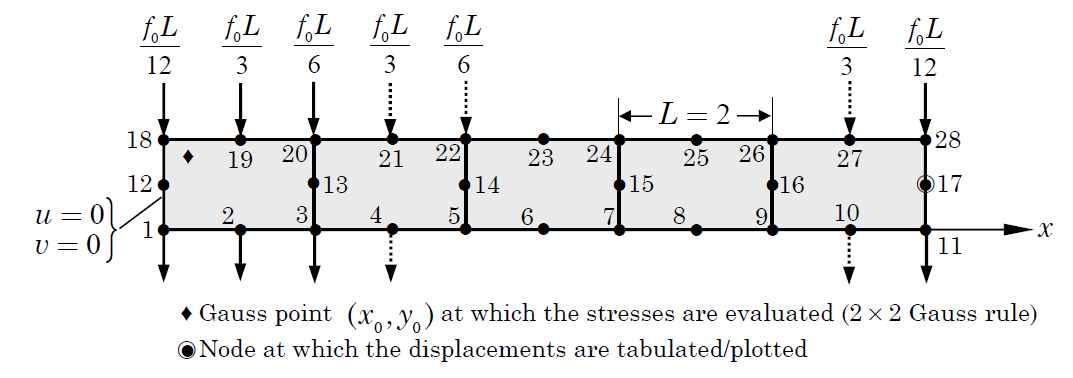

In [51]:
cantilever_fem.formulation = 'TLF'
cantilever_fem.run_complete(nsteps=10)

In [52]:
cantilever_fem.udisp

tensor([ 0.0000e+00,  0.0000e+00, -1.7739e-01, -1.5166e-01, -3.8955e-01,
        -5.2769e-01, -6.5957e-01, -1.0791e+00, -9.9938e-01, -1.7428e+00,
        -1.3934e+00, -2.4921e+00, -1.8307e+00, -3.2875e+00, -2.2944e+00,
        -4.1165e+00, -2.7741e+00, -4.9618e+00, -3.2595e+00, -5.8174e+00,
        -3.7461e+00, -6.6751e+00,  0.0000e+00,  0.0000e+00, -1.2900e-01,
        -5.9547e-01, -6.2563e-01, -1.9098e+00, -1.4160e+00, -3.5071e+00,
        -2.3469e+00, -5.2020e+00, -3.3173e+00, -6.9182e+00,  0.0000e+00,
         0.0000e+00,  1.1884e-01, -2.0063e-01,  1.2619e-01, -6.7735e-01,
        -6.0959e-03, -1.3247e+00, -2.5588e-01, -2.0784e+00, -5.9816e-01,
        -2.8868e+00, -1.0028e+00, -3.7285e+00, -1.4497e+00, -4.5821e+00,
        -1.9199e+00, -5.4427e+00, -2.4023e+00, -6.3026e+00, -2.8883e+00,
        -7.1618e+00])

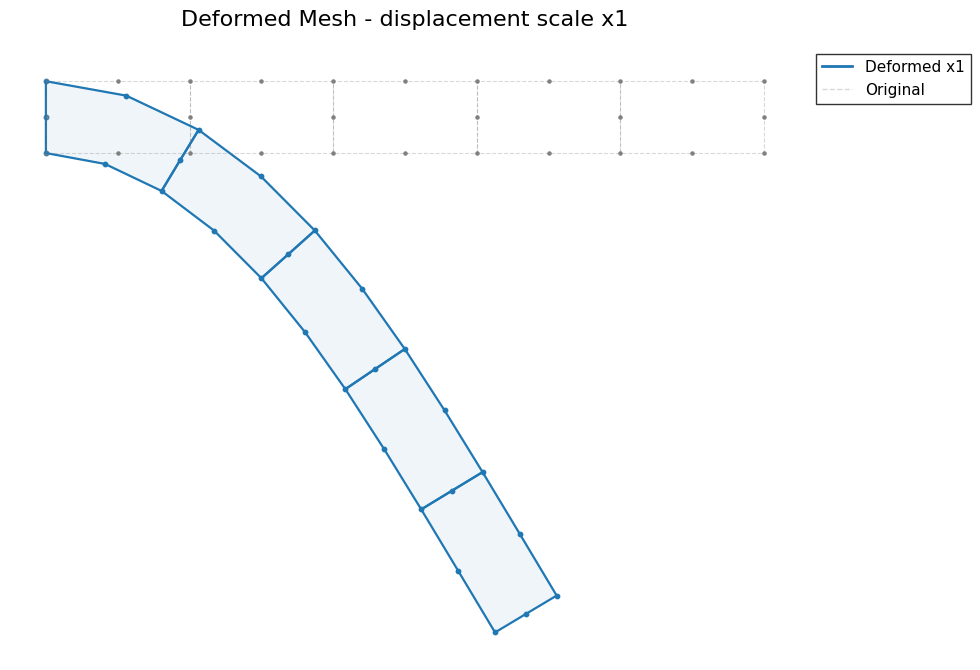

In [53]:
cantilever_fem.plot_deformed_mesh(scale=1)